# OpenPayments Dataset Analysis

### Yawen Han (yh3069)
### March 22, 2019

In [1]:
#load libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
df_general = pd.read_csv("data/OP_DTL_GNRL_PGYR2017_P01182019.csv")
df_research = pd.read_csv("data/OP_DTL_RSRCH_PGYR2017_P01182019.csv")

The objetive of this project is to predict whether a payment by a company to a medical doctor or facility was made as part of a research project or not. The dataset used here is **"Complete 2017 Program Year Open Payments Dataset"** from CMS website (https://www.cms.gov/OpenPayments/Explore-the-Data/Dataset-Downloads.html). Two csv files in the datasets are used here: one for General Payment, the other for Research Payment.  

## Task 1 Identify Features

This section focus on assembling a dataframe that consists of features and target, which will be used for analysis and modeling later. The two datasets been processed here are **"General Payment"** dataset and **"Researh Payment"** dataset, and the "Target" of each record are marked as "Genral" or "Research" corresponding to its original dataset. 

Before combining the two datasets, some feature analysis are performed to exclude columns that ***leak the target information*** and the columns that ***contain too many missing values***.

### 1.1 Basic structure

The overall goal of the project is to predict whether a payment by a company to a medical doctor or facility was made as part of a research project or not. Thus, we need to combine the "General Payment" dataset and "Research Payment dataset" to gether. Before that, let's have a look at the structure of each dataset:


In [3]:
#Basic dataset shape
print("The shape of General Payment dataset is: ", df_general.shape)
print("The shape of Research Payment dataset is: ", df_research.shape)

The shape of General Payment dataset is:  (10663833, 75)
The shape of Research Payment dataset is:  (602530, 176)



From the shape outputs above, the shapes of two dataset have obvious differnece: the "General Payment" dataset has nearly **18 times** number of records of "Research Payment" dataset, while less than half of columns of "Research Payment" dataset oppositely. 


### 1.2 Leak-info columns

First, we need to figure out the shared columns of two datasets. To avoid the traget information been leaked from the distinct columns of two datasets, we need to find the shared columns of them and only use these shared columns as modeling features.

In [4]:
# find the shared columns of general dataset and research dataset
shared_columns = [column for column in df_general.columns if column in df_research.columns]     
print("Number of shared columns for General and Research dataset: ",len(shared_columns))

Number of shared columns for General and Research dataset:  64


The total number of shared columns for "General Payment" and "Research Payment" dataset are **64**. Then, we subset these shared columns form the original datasets:

In [5]:
# Subset the shared columns from general dataset and research dataset
df_general_shared = df_general[shared_columns]
df_research_shared = df_research[shared_columns]

### 1.3 Large missing-value columns

Before combining the two subset datasets, it's good to check the percentage of missing values for each column. The percentage of missing values for each column are shown below:

In [6]:
def find_missing(df):
    '''
    function used to find the percentage of missing value for 
    each column with the given dataframe
    '''
    missing = df.isnull().sum()/len(df)
    return round(missing,2)
    
# check the missing values for each columns
df_missing = pd.DataFrame({'Columns':shared_columns,'General Payment':find_missing(df_general_shared),
                           'Research Payment':find_missing(df_research_shared)})
df_missing = df_missing.set_index(pd.Series(list(range(64))))

In [7]:
# the missing value perdentage for each column for two datasets
df_missing

,Columns,General Payment,Research Payment
0,Change_Type,0.00,0.00
1,Covered_Recipient_Type,0.00,0.00
2,Teaching_Hospital_CCN,1.00,0.84
3,Teaching_Hospital_ID,1.00,0.84
4,Teaching_Hospital_Name,1.00,0.84
5,Physician_Profile_ID,0.00,0.96
6,Physician_First_Name,0.00,0.96
7,Physician_Middle_Name,0.42,0.97
8,Physician_Last_Name,0.00,0.96
9,Physician_Name_Suffix,0.97,1.00


In the table above, it's clear to see that some columns have more than **70% missing values**. It is undeniable that if the majority of data values is missing, the data column itself cannot carry that much information. What's more, if we keep these columns, it's hard to handling missing values by either removing records or filling missing values. Therefore, it's resonable to remove Data Columns with too many Missing Values.

In [8]:
#drop the columns with more than 70% missing values
df_drop = df_missing[(df_missing['General Payment']>0.70) | (df_missing['Research Payment']>0.70)].index
df_remain = df_missing.copy()
df_remain = df_remain.drop(df_drop)

After removing the features with more than 70% missing values, the percentage of missing values for the remian features:

In [9]:
df_remain

,Columns,General Payment,Research Payment
0,Change_Type,0.00,0.00
1,Covered_Recipient_Type,0.00,0.00
10,Recipient_Primary_Business_Street_Address_Line1,0.00,0.00
12,Recipient_City,0.00,0.00
13,Recipient_State,0.00,0.00
14,Recipient_Zip_Code,0.00,0.00
15,Recipient_Country,0.00,0.00
25,Submitting_Applicable_Manufacturer_or_Applicab...,0.00,0.00
26,Applicable_Manufacturer_or_Applicable_GPO_Maki...,0.00,0.00
27,Applicable_Manufacturer_or_Applicable_GPO_Maki...,0.00,0.00


Set the removing threshold of missing values as **0.70**, the columns remianed and their corresponding missing values for each dataset are shown above. 

Next, subset the "General Payment" and "Research Payment" dataset by removing the columns with too many missing values, and recheck the structure of the updated datasets:

In [10]:
# subset the general dataset by dropping the columns with too many missing values
df_general_remain = df_general[df_remain["Columns"]]
# subset the research dataset by dropping the columns with too many missing values
df_research_remain = df_research[df_remain["Columns"]]
# output shape of updated datasets
print("The shape of updated General Payment dataset is: ", df_general_remain.shape)
print("The shape of updated Research Payment dataset is: ", df_research_remain.shape)

The shape of updated General Payment dataset is:  (10663833, 26)
The shape of updated Research Payment dataset is:  (602530, 26)


According to the structure output above, the columns for two datasets are same with **26** remained, but the "General Payment" dataset still has nearly **18 times** number of records of "Research Payment" dataset.

### 1.4 Combine the updated "General" and "Research" dataset

After removing the columns that **leak the target information** and the columns that **contain too many missing values**, adding a new "Target" column marked as class **"0" for "General"** or **"1" for "Research"** for each dataset. Then assemble the two updated datasets together, the first 5 records of the comined dataset are shown below:

In [11]:
# add Target column to each subset 
df_general_remain["Target"] = 0
df_research_remain["Target"] = 1
# combine two subset datasets
df = df_general_remain.append(df_research_remain)
df.head()

,Change_Type,Covered_Recipient_Type,Recipient_Primary_Business_Street_Address_Line1,Recipient_City,Recipient_State,Recipient_Zip_Code,Recipient_Country,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,...,Dispute_Status_for_Publication,Related_Product_Indicator,Covered_or_Noncovered_Indicator_1,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Product_Category_or_Therapeutic_Area_1,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1,Associated_Drug_or_Biological_NDC_1,Program_Year,Payment_Publication_Date,Target
0,UNCHANGED,Covered Recipient Physician,422 KINETIC DR,HUNTINGTON,WV,25701,United States,Mission Pharmacal Company,100000000186,Mission Pharmacal Company,...,No,Yes,Covered,Drug,Antibacterial (topical),Plexion,57883-402-10,2017,01/18/2019,0
1,UNCHANGED,Covered Recipient Physician,5323 Harry Hines Blvd,Dallas,TX,75390,United States,Mission Pharmacal Company,100000000186,Mission Pharmacal Company,...,No,No,NaN,NaN,NaN,NaN,NaN,2017,01/18/2019,0
2,UNCHANGED,Covered Recipient Physician,422 KINETIC DR,HUNTINGTON,WV,25701,United States,Mission Pharmacal Company,100000000186,Mission Pharmacal Company,...,No,Yes,Covered,Drug,Antibacterial (topical),Ovace,0178-0620-02,2017,01/18/2019,0
3,UNCHANGED,Covered Recipient Physician,422 KINETIC DR,HUNTINGTON,WV,25701,United States,Mission Pharmacal Company,100000000186,Mission Pharmacal Company,...,No,Yes,Covered,Drug,Antibacterial (topical),Avar,0178-0640-30,2017,01/18/2019,0
4,UNCHANGED,Covered Recipient Physician,1919 NORTH LOOP W,HOUSTON,TX,77008,United States,Mission Pharmacal Company,100000000186,Mission Pharmacal Company,...,No,Yes,Covered,Drug,PRENATAL VITAMIN & MINERAL,CITRANATAL,0178-0796-30,2017,01/18/2019,0


In [12]:
# output shape of updated datasets
print("The shape of assembeled dataset is: ", df.shape)

The shape of assembeled dataset is:  (11266363, 27)


As the output shown above, there are **11266363** records and **27** features in the assembled dataset. This dataset will be processed and modeled in the following sections. The summary of each feature are listed below:

In [13]:
# summary of each column
df.describe(include="all")

,Change_Type,Covered_Recipient_Type,Recipient_Primary_Business_Street_Address_Line1,Recipient_City,Recipient_State,Recipient_Zip_Code,Recipient_Country,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,...,Dispute_Status_for_Publication,Related_Product_Indicator,Covered_or_Noncovered_Indicator_1,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Product_Category_or_Therapeutic_Area_1,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1,Associated_Drug_or_Biological_NDC_1,Program_Year,Payment_Publication_Date,Target
count,11266363,11266363,11265719,11265717,11264906,11264906,11265720,11266363,1.126636e+07,11266363,...,11266363,11266363,10650955,10332552,10274944,10305534,8002708,11266363.0,11266363,1.126636e+07
unique,3,4,613645,20880,61,225513,25,1335,NaN,1529,...,2,2,2,4,2172,13562,1503,NaN,1,NaN
top,UNCHANGED,Covered Recipient Physician,9500 EUCLID AVE,HOUSTON,CA,77030,United States,Pfizer Inc.,NaN,PFIZER INC.,...,No,Yes,Covered,Drug,Diabetes,XARELTO,5045-8580-30,NaN,01/18/2019,NaN
freq,10688880,10646905,11647,142302,1144061,23513,11264906,651456,NaN,588914,...,11264613,10650956,10235373,7059525,572969,282655,282655,NaN,11266363,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,NaN,5.348044e-02
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.388481e+04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.249895e-01
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,NaN,0.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,NaN,0.000000e+00


For categorical features, they are summarized by *"count", "unique", "top", and "freq"*. The "top" is the most common value, and the "freq" is the most common value’s frequency. For numerical features, they are summaruized by *"count", "mean", "std", "min", "max"* as well as *"25, 50 and 75 percentiles"*.

It is observed that:  
  1) **high cardinality categorical features**: some categorical features have too many unique values. For example, "Recipient_Primary_Business_Street_Address_Line1" with 613645 distinct values;  
  2) **zero-cardinality/variance features**: some features only has one value(categorical) or variance=0(numerical). For example, "Program_Year" only has value "2017", "Payment_publication_Date" only has value"01/18/2019";

Besides the observations above, we still need to consider the **"Imbalance data"**, **"Missing values"** indicated above in the following sections.

## Task 2 Preprocessing and Baseline Model

This section focus on exploratory data analysis on the dataset assembled in section 1, including **"Remove zero-cardinality/variance features**", **"Recheck Missing values"**, **"Check thecontinuous feature"**, and **"Check the categorical feature"**. Then, **"Baseline Model"** creates a simple minimum viable model by doing an initial selection of features, doing appropriate preprocessing and cross-validating a linear model.

### 2.1 Remove zero-cardinality/variance features

In section 1, the combined dataset contains some **zero-cardinality/variance features**. For example, the categorical variable "Payment_publication_Date" only has one category as "01/18/2019", and the numerical variable "Program_Year" has the variance as 0, with only one value as "2017.0". 

In [14]:
# show the numer of unique counts for each feature
df_unique = df.nunique().reset_index()
df_unique.columns = ['Column','Unique Counts']
df_unique[df_unique['Unique Counts']==1]

,Column,Unique Counts
15,Delay_in_Publication_Indicator,1
24,Program_Year,1
25,Payment_Publication_Date,1


The table above shows all the features with zero-cardinality/variance, including **"Delay_in_Publication_Indicator"**, **"Payment_Publication_Date"** and **"Program_Year"**.

Then visualize the distribution of these features below:

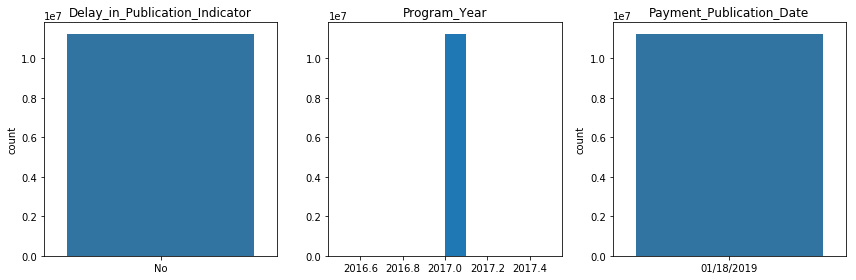

In [15]:
#Histogram/barchart for all attributes with only 1 value
fig = plt.figure(figsize=(12,4))
unique_columns = df_unique[df_unique['Unique Counts']==1]["Column"].tolist()
for i, column in enumerate(unique_columns):
    ax = fig.add_subplot(1,3,i+1)
    _ = ax.set_title(column)
    if df.dtypes[column] == np.object:
        _ = sns.countplot(df[column], axes=ax)
        _ = ax.set_xlabel("")
        
    else:
        _ = ax.hist(df[column])
    ax.ticklabel_format(axis='y', style='sci',scilimits=(-2,2))
plt.tight_layout()
plt.show()
    

For the three features: "Delay_in_Publication_Indicator", "Payment_Publication_Date" and "Program_year", they consist of a single value. The zero-cardinality/variance features can not provide any information to classify the target. Thus, these irrelavent features are removed here to save time during modeling.

In [16]:
# drop feature"Payment_Publication_Date" and "Program_year"
df = df.drop(axis=1,columns=unique_columns)
# output shape of updated datasets
print("The shape of updated dataset is: ", df.shape)

The shape of updated dataset is:  (11266363, 24)


The updated dataset has **11266363** records and **24** features.

### 2.2 Recheck missing values

In section 1, the combined dataset still contains some missing values after dropping the columns with too much missing values. Before the initial baseline modeling, we need to deal with the missing values first.


#### 2.2.1 Bar chart of "Percentage missing values"

Plot the bar chart of "Percentage missing values" for each feature:

In [17]:
# check the missing values for each columns
df_missing2 = pd.DataFrame({'Columns':df.columns,'Missing Percentage':find_missing(df)})

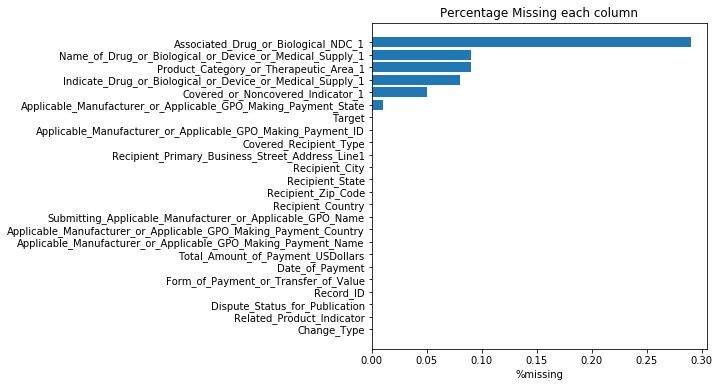

In [18]:
# show the percentage of missing values in bar chart
fig = plt.figure(figsize=(6,6))
df_missing2 = df_missing2.sort_values('Missing Percentage')
_ = plt.barh(df_missing2['Columns'], df_missing2['Missing Percentage'])
_ = plt.title("Percentage Missing each column")
_ = plt.xlabel("%missing")

The bar chart above shows the percentage of missing values in each column in decreasing order. It is observed that the columns with missing values are **"Associated_Drug_or_Biological_NDC_1", "Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1","Product_Category_or_Therapeutic_Area_1",  "Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1", "Covered_or_Noncovered_Indicator_1",** and **"Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State"**.

Since we have **11266363** records in the dataset, and the missing values are less than 30%, ignore the observations of missing values might be a option. But we need to check if missing values follows a **totally randomly missing** rule. 


#### 2.2.2 Missing patterns and fetures denpendence

Before dealing with the missing data, we need to figure out the dependence of missing values. First, check the missing patterns below:

In [19]:
# list of missing columns
missing_columns = df_missing2[df_missing2["Missing Percentage"]>0]["Columns"].tolist()

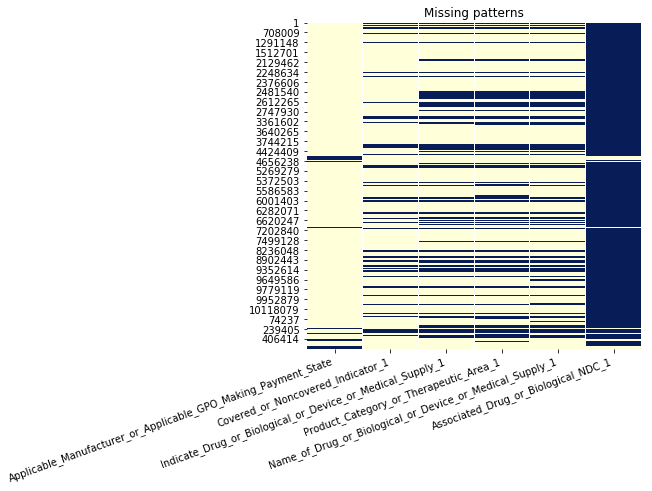

In [20]:
# check the missing patterns 
fig = plt.figure(figsize=(6,6))
ax = sns.heatmap(df[df.isnull().any(axis=1)][missing_columns].isnull(),cmap="YlGnBu",cbar=False)
_ = ax.set_title("Missing patterns")
_ = ax.set_xticklabels(missing_columns, rotation = 20, ha="right")

The matrix above displays a literal translations of a data table's nullity matrix. It is useful for snapshotting general missing patterns:  
1) the feature **"Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State"** has least missing values, and are not appear with other missing values at the same time;  
2) the features with suffix as **"\_1"** are usually appear at the same time, and the feature  **"Associated_Drug_or_Biological_NDC_1"** shows missing for all missing records with "\_1" suffix.  

Then, we should explore the how strongly the presence or absence of one variable affects the presence of another. The heatmap below provides a visualization for examining relationships within pairs of variables:

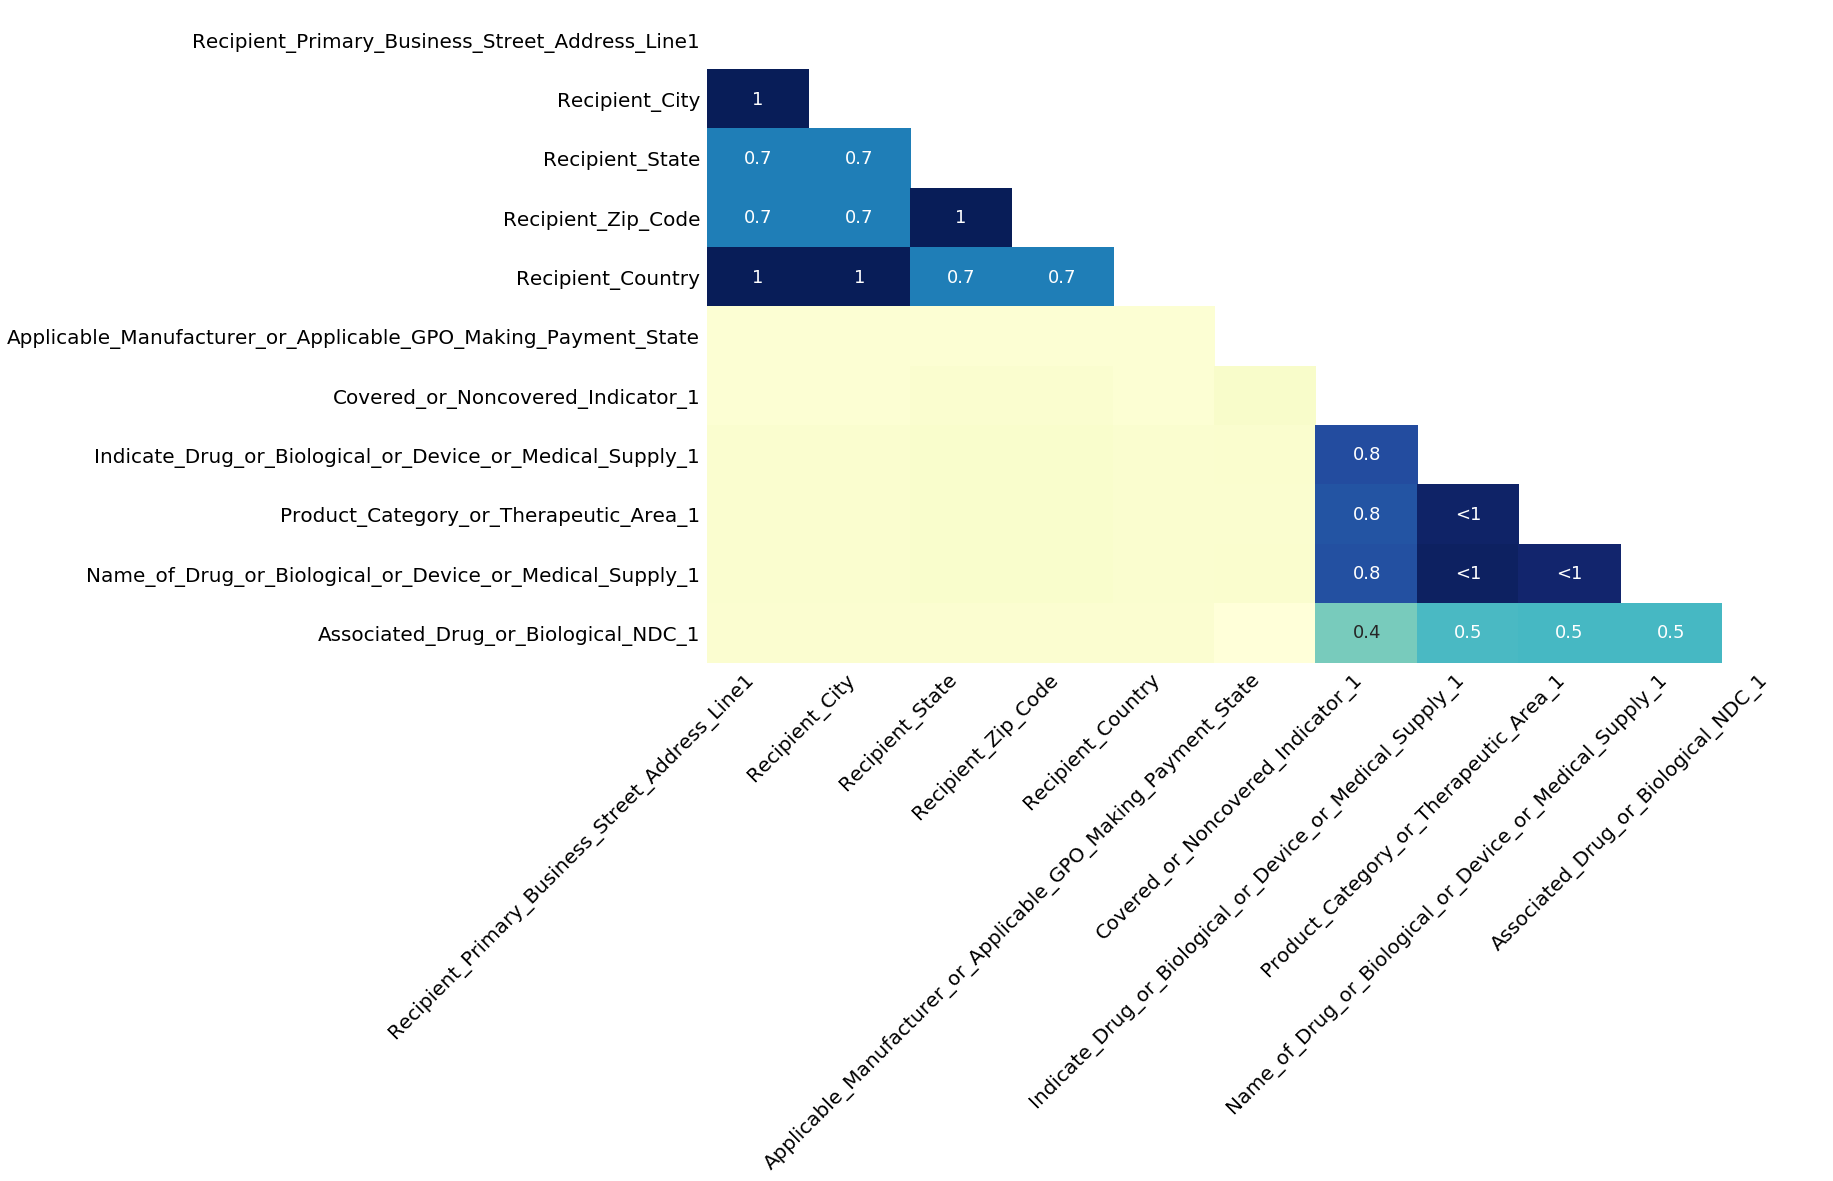

In [21]:
import missingno as msno
# show the missing dependence as a heatmap
_ = msno.heatmap(df,fontsize=20,cmap="YlGnBu")

Nullity correlation ranges from **0 (variables appearing or not appearing have no effect on one another)** to **1 (if one variable appears the other definitely also does)**. Entries marked **<1** are have a correlation that is close to being exactingly positive, but is still not quite perfectly so. Features that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization.

From the heatmap above, it is observed:  
1) the missing values of feature **"Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State"** are independent with other features. Since it is missing compeletely at random, we can drop its associated records directly;  
2) the missing values of features with **"\_1"** suffix are highly correlated with each other, we cannot drop these records diredtly, instead we can treat these missing values as a new category **"Missing"** in each feature;  
3) the ***"Recipient"*** information features are highly correlated with each other, thus we need to consider handling this problem later in *section 2.4 "Check the categorical features"*.

In [22]:
# drop the records containing missing values on feature "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State"
df = df.dropna(axis=0, subset = ["Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State"], 
               inplace=False)
# replace na with string "Missing"
df.fillna("Missing", inplace=True)


In [23]:
# recheck the missing values
print("The number of missing values: ", find_missing(df).sum())
# output shape of updated datasets
print("The shape of updated dataset is: ", df.shape)

The number of missing values:  0.0
The shape of updated dataset is:  (11106468, 24)


After handling the missing values, no **missing** value in the dataset, and the updated dataset has **11106468** records and **24** features.

### 2.3 Check the continuous feature

After dealing with "zero-cardinality/variance features" and "missing values", the next check point is to explore the continuous variables in the dataset. At this point, the features not characterized as "object" data type are considered to be continuous variables.  

#### 2.3.1 Distributions of continuous features

First, check the distribution of each continuous feature. Plot the density distribution of each continuous feature for two classes below:

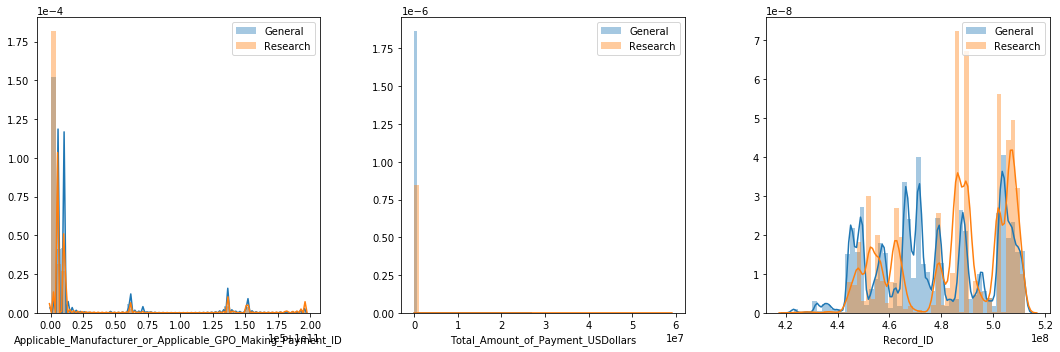

In [24]:
#density plot for numerical variables
fig = plt.figure(figsize=(15,5))
count = 1 
for column in df.columns:
    if (df.dtypes[column] != np.object) & (column != "Target"):
        ax = fig.add_subplot(1, 3, count)
        sns.distplot(df[df["Target"]==0][column], kde=True,label="General",ax=ax)
        sns.distplot(df[df["Target"]==1][column], kde=True,label="Research",ax=ax)
        ax.legend(loc='upper right')
        ax.ticklabel_format(axis='both', style='sci',scilimits=(-2,2))
        count = count+1

plt.tight_layout()
plt.show()

There are three continuous features in the dataset: **"Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID"**, **"Total_Amount_of_Payment_USDollars"**, and **"Record_ID"**. 

The density plots above shows:  
1) feature "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID" and "Total_Amount_of_Payment_USDollars" are highly right skewed, it seems there are outliers in these two features;  
2)  feature "Total_Amount_of_Payment_USDollars" has different density distribution for "General" class and "Research" class;  
3)  feature "Record_ID" has different distribution for "General" class and "Research" class, but we need to reconsider the unique charcater of this feature served as a identifier later.

#### 2.3.2 Outliers

Data are prone to outliers. Outlier is an abnormal value which stands apart from rest of data points. It can happen due to various reasons. Most common reason include challenges arising in data collection methods. According to the distribution analysis above, it's good to check the outliers using boxplot here.

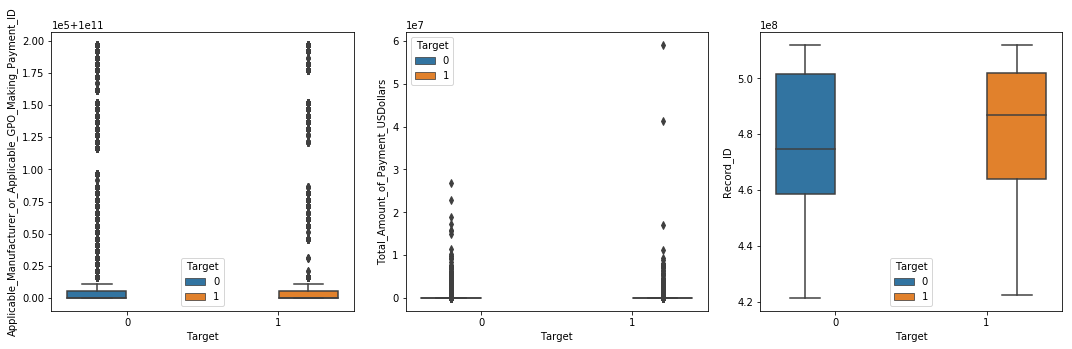

In [25]:
#boxplot for numerical variables
fig = plt.figure(figsize=(15,5))
count = 1 
for column in df.columns:
    if (df.dtypes[column] != np.object) & (column != "Target"):
        ax = fig.add_subplot(1, 3, count)
        sns.boxplot(y=df[column],x=df['Target'],ax=ax,hue=df["Target"])
        ax.ticklabel_format(axis='y', style='sci',scilimits=(-2,2))
        count = count+1
plt.tight_layout()
plt.show()

The boxplots above show all three features contain values far beyond the median, next we want to check if these values are outliers or not.

Outliers Check:  
  1) **"Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID"**: this feature indicates the Payment_ID for applicable manufacturer or applicable GPO, which served as a identifier, thus it should not be considered as a continuous variable as its value does not convey any information. Therefore, no meaning to consider the outliers, further discussions needed to check whether keep this feature or not;  
  2) **"Total_Amount_of_Payment_USDollars"**: this feature indicates the total amount of payments. From the density plot and boxplot above, it's observed that most large values occur in the "Research" class, which may serve as a classification criteria for the model. Therefore, the large values are not removed here, further scaling process may be performed later;  
  3) **"Record_ID"**: this feature indicates the Record_ID, which served as a identifier, thus it should not be considered as a continuous variable as its value does not convey any information. Therefore, no meaning to consider the outliers, further discussions needed to check whether keep this feature or not; 


#### 2.3.3 Target-based values counts

As mentions above, feature **"Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID"** and **"Record_ID"** should not be considered as a continuous variable as its value does not convey any information. let's further explore these two features by having a look at the number of value counts of two target classes for each feature:

In [26]:
df.groupby("Target")[['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
                      "Record_ID"]].nunique().reset_index()

,Target,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Record_ID
0,0,1287,10566841
1,1,479,539627


In the table above, the two features are grouped by the classes and counts the nymber of unqiue values in each class. It's clear to see that although **"Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID"** works as a identifier here, but it's not distinct for each records, the ID do provide somewhat information about the class. 

However, **"Record_ID"**  are purely workes as a identifier here as all the records contain distince Record_ID. The non-uniform distribution in the density plot is probably as a result of the "removing missing values" and "grouping classes" above. Thus, the feature **"Record_ID"** should be dropped here as it conveys no information for modeling.

In [27]:
# drop the records containing missing values inside
df = df.drop(axis=1,columns=["Record_ID"])
# output shape of updated datasets
print("The shape of updated dataset is: ", df.shape)

The shape of updated dataset is:  (11106468, 23)


The updated dataset has **11106468** records and **23** features.

Then, as **"Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID"** works as a identidier, it should not be treated as numerical variables, instead should be treated as categorical variables. Change the datatype of the column to be "object":

In [28]:
# change the datatype of "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID" from int to str
df['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID'] = df['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID'].astype(str) 


In [29]:
# check the datatypes of each column
df_dtypes = pd.DataFrame(df.dtypes,columns=["Datatype"])
df_dtypes

,Datatype
Change_Type,object
Covered_Recipient_Type,object
Recipient_Primary_Business_Street_Address_Line1,object
Recipient_City,object
Recipient_State,object
Recipient_Zip_Code,object
Recipient_Country,object
Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,object
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,object
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,object


Recheck the datatypes of each column, and the table above shows the only numeric variable is **"Total_Amount_of_Payment_USDollars"**.

### 2.4 Check the categorical features

After dealing with continuous features, the next check point is to explore the categorical variables in the dataset. At this point, the features characterized as "object" data type are considered to be categorical variables.

#### 2.4.1 The highly correlated "Recipient Address" info features

Check the number of unique categories for features expressing "Recipient Address" information:

In [30]:
# show the missing dependence as a heatmap
recipient_address_columns = ["Recipient_Primary_Business_Street_Address_Line1", "Recipient_City", 
                             "Recipient_State", "Recipient_Zip_Code", "Recipient_Country"]

pd.DataFrame(df[recipient_address_columns].nunique(),columns=["Unique Number"])

,Unique Number
Recipient_Primary_Business_Street_Address_Line1,611152
Recipient_City,20831
Recipient_State,62
Recipient_Zip_Code,224718
Recipient_Country,26


In section ***2.2.2 "Missing patterns and fetures denpendence"***, it is observed that the "Recipient" information features are highly correlated with each other. These features including: **"Recipient_Primary_Business_Street_Address_Line1"**, **"Recipient_City"**, **"Recipient_State"**, **"Recipient_Zip_Code"** and **"Recipient_Country"**; they are highly correlated with each other as they all provide the similat information regarding the ***"Recipient address"***. 

What's more, from the table above, some features containing too many labels, it's hard to apply OneHot-encoding later. Here, the "Recipient Address" columns are generalized to the **"State"** and **"Country"** level, the other detailed information will not be considered in the modeling preocess. Thus, other features are dropped here.

In [31]:
# drop feature "Payment_Publication_Date" and "Program_year"
df = df.drop(axis=1,columns=["Recipient_Primary_Business_Street_Address_Line1", "Recipient_City", 
                            "Recipient_Zip_Code"])
# output shape of updated datasets
print("The shape of updated dataset is: ", df.shape)

The shape of updated dataset is:  (11106468, 20)


The updated dataset has **11106468** records and **20** features.

### 2.5 Baseline model

Using the dataset got after the previous preprocessing to build a simple minimum viable model. First, to save the modeling cost, random sampling 10% of the records form the dataset for the baseline model:

In [32]:
#random sample 10% as the sample dataset
df_sample = df.sample(frac=0.1, replace=False, random_state=1)
# output shape of updated datasets
print("The shape of updated dataset is: ", df_sample.shape)

The shape of updated dataset is:  (1110647, 20)


The sample used for baseline model has **1110647** records and **20** features.

As some features has a high-cardinality, it will generate too much features using **OneHotEncoding** method, thus we simply exclude these features here for the baseline model. The threshold for cardinality is set to be **10**: if the cardinality of a feature is above 10, this feature will be excluded from the baseline modeling. However, we will consider use **TargetBasedEncoding** later in ***Task3***.

In [33]:
# find features with cardinality greater than 10 and drop them from baseline features
high_cardinality_boolean = ((df.nunique()>10) & (df.dtypes == np.object)).tolist()
df_baseline = df_sample.drop(axis=1,columns=df.columns[high_cardinality_boolean])
# output shape of updated datasets
print("The shape of updated dataset is: ", df_baseline.shape)

The shape of updated dataset is:  (1110647, 10)


The sample used for baseline model has **1110647** records and **10** features.

Then, we want to check the distribution of these features to see if there is still any feature that leaking the traget information:

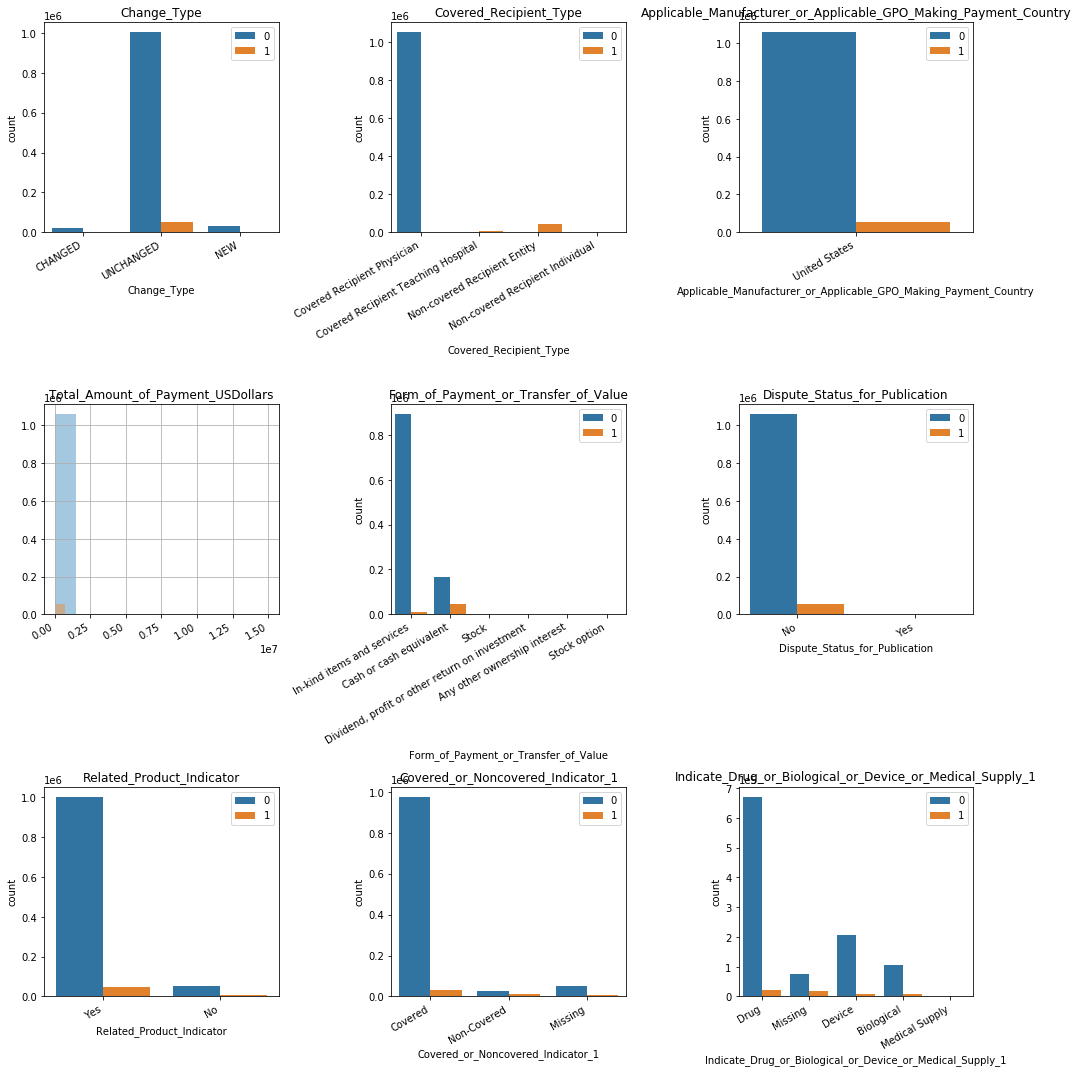

In [34]:
#Histogram for all attributes
fig = plt.figure(figsize=(15,15))
cols = 3
rows = 3
for i, column in enumerate(df_baseline.columns[:-1]):
    
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if df_baseline.dtypes[column] == np.object:
        
        sns.countplot(df_baseline[column],hue=df_baseline['Target'],axes=ax)
        plt.legend(loc='upper right')
        plt.xticks(rotation=30,ha="right")
        ax.ticklabel_format(axis='y', style='sci',scilimits=(-2,2))
        
    else:
        _= df_baseline.groupby("Target")[column].hist(alpha=0.4, axes=ax)
        plt.xticks(rotation=30,ha="right")  
        ax.ticklabel_format(axis='y', style='sci',scilimits=(-2,2))
plt.tight_layout()
plt.show()

From the bar chart above, it is observed that there is no feature that leak the target information here. Moreover, as the feature "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country" only has one value here, we drop it from the baseline model.

In [35]:
df_baseline = df_baseline.drop(axis=1,columns=["Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country"])
# output shape of updated datasets
print("The shape of updated dataset is: ", df_baseline.shape)

The shape of updated dataset is:  (1110647, 9)


The updated baseline dataset has **1110647** records and **9** features.

Here use the ***RidgeClassifier*** as the baseline linear model, then calculate the cross-validation score and test-score using the sampled dataset.

In [36]:
from sklearn.model_selection import train_test_split

# train-test split
X_baseline = np.array(df_baseline.iloc[:,:-1])
y_baseline = np.array(df_baseline.iloc[:,-1])
#split data in training and test set
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X_baseline, y_baseline)

In [37]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

continuous = df_baseline.columns == "Total_Amount_of_Payment_USDollars"
continuous = continuous.tolist()[:-1]
categorical = [not ele for ele in continuous]

# scale the continuous features and OneHOtEncoded categorical features
base_preprocess = make_column_transformer(
    (StandardScaler(), continuous),
    (OneHotEncoder(handle_unknown="ignore"), categorical)
    )
#build pipeline with preprocessing and RidageClassifier
base_pipeline=make_pipeline(base_preprocess,RidgeClassifier())


In [38]:
# 5-fold cross-validation scores
val_scores = cross_val_score(base_pipeline, X_base_train, y_base_train, cv = 5)
base_cv = np.mean(val_scores)
print("The cross-validation score of baseline model: ", round(base_cv,4))

The cross-validation score of baseline model:  0.9941


Use the **StandardScaler** to scale the continuous features, and **OneHotEncoder** to convert categorical features as numerical value. From the output above, the **cross-validation score** of baseline model:  **0.9942**, which is pretty high. This is might as a result of ***"large training set"*** and ***"imbalanced dataset"***. Hence, we need to check other metrics to evaluate the preformance of baseline model.

In [39]:
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

def plot_measurement(y_test, y_predict):
    '''
    Function plot_measurement used to plot confusion matrix, roc, and precision-recall curve
    paras:
        y_test: the test target value (array-like)
        y-predict: the predicted target value (array-like)
    return:
        accuracy: prediction accuracy
        average precision: prediction average precision
        f_score: prediction f1 measurement score 
    '''
    #accuracy
    accuracy = metrics.balanced_accuracy_score(y_test, y_predict)
    print("The balanced accuracy score is %f" % accuracy)
    #precision
    average_precision = metrics.average_precision_score(y_test, y_predict)
    print('Average precision score is %f' %average_precision)
    # F-measure
    f_score = metrics.f1_score(y_test, y_predict)
    print ("The F-measure score is %f" % f_score)

    
    fig = plt.figure(figsize=(15,5))

    # Plot 1: heatmap for confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predict)
    cm_heatmap = fig.add_subplot(1, 3, 1)
    cm_heatmap = sns.heatmap(cm, cmap="PuBu",annot=True, fmt="d")
    cm_heatmap.set_ylabel("Real value")
    cm_heatmap.set_xlabel("Predicted value")
    cm_heatmap.set_title('Confusion Matrix')
    
    # Plot 2: roc and auc
    roc = fig.add_subplot(1, 3, 2)
    # calculate the fpr and tpr for all thresholds of the classification
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
    roc_auc = metrics.auc(fpr, tpr)#auc
    _ = plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
    roc.plot([0, 1], [0, 1], color='navy', linestyle='--')
    roc.set_xlim([0.0, 1.0])
    roc.set_ylim([0.0, 1.0])
    roc.set_xlabel('False Positive Rate')
    roc.set_ylabel('True Positive Rate')
    roc.set_title('Receiver Operating Characteristic')
    _ = plt.legend(loc="lower right")
    
    # Plot 3: Precision_recall curve
    prc = fig.add_subplot(1, 3, 3)
    precision, recall, _ = precision_recall_curve(y_test, y_predict)
    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    prc.step(recall, precision, color='b', alpha=0.2,
         where='post')
    prc.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    prc.set_xlabel('Recall')
    prc.set_ylabel('Precision')
    prc.set_ylim([0.0, 1.05])
    prc.set_xlim([0.0, 1.0])
    prc.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    
    plt.tight_layout()
    plt.show()
    
    return accuracy, average_precision, f_score
    
    

The balanced accuracy score is 0.975828
Average precision score is 0.886386
The F-measure score is 0.940219


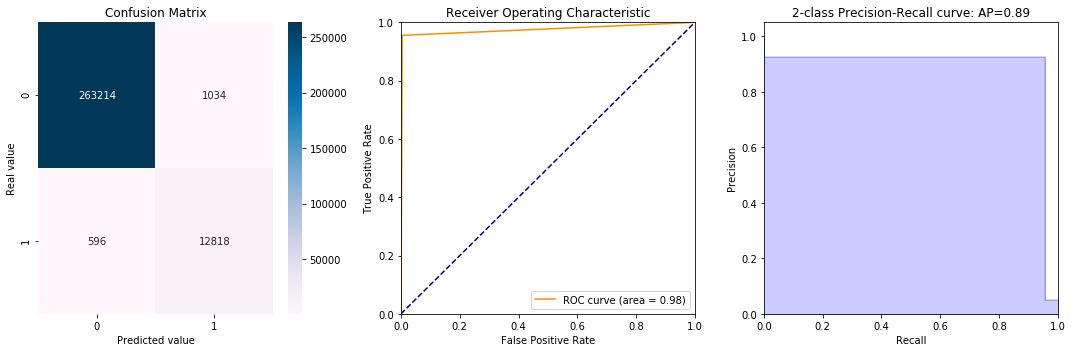

In [40]:
# fit the pipeline and predict
_ = base_pipeline.fit(X_base_train, y_base_train)
base_pred = base_pipeline.predict(X_base_test)

# use the plot_measurement function to get confusion matrix, roc, precision-recall curve
base_accuracy, base_precision, base_f1 = plot_measurement(y_base_test, base_pred)

In [41]:
# summarize the performance scores in a dataframe
d = {'CV_accuracy': [base_cv], 'Test_accuracy':[base_accuracy], 'Precision':[base_precision], 'f_score':[base_f1]}
df_summary = pd.DataFrame(data=d, index=["Baseline"])
df_summary

,CV_accuracy,Test_accuracy,Precision,f_score
Baseline,0.994131,0.975828,0.886386,0.940219


According to the output and charts above, for the test dataset:  

Both the **corss-validation accuracy** is 0.99, and the **test accuracy** is **0.97**, which is very high, but the average **precision** score is not as good as accuracy with score **0.88**. This is probably as a result of the ***imbalanced dataset***. The high accuracy might also because the large dataset, contributing to improve the accuracy of classification. Also, as the test accuracy is beyond the cross-validation accuracy, the **overfitting** problem may occur here.

## Task 3 Feature Engineering

After the initial selection of features, doing appropriate preprocessing and cross-validating a baseline linear model, this section focus on more in-depth preprocessing and data-cleaning, inclding Continuouse feature **Bining**, Categorical features **Encoding**, handling **Imbalanced dataset**.

### 3.1 Methods used to scale the continuous feature - Bining

In **section 2.3.3**, it's observed that for the only continuous feature "Total_Amount_of_Payment_USDollars", most large values occur in the "Research" class, which may serve as a classification criteria for the model. Therefore, the large values are not considered as outliers there, and are not removed. We performed further feature engineering process here:

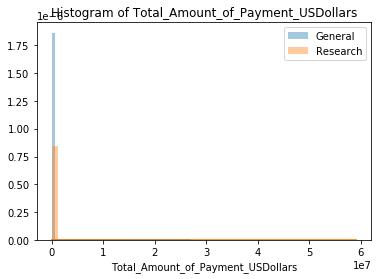

In [42]:
# distribution histogram
sns.distplot(df[df["Target"]==0]["Total_Amount_of_Payment_USDollars"], kde=True,label="General")
sns.distplot(df[df["Target"]==1]["Total_Amount_of_Payment_USDollars"], kde=True,label="Research")
_ = plt.legend(loc='upper right')
plt.ticklabel_format(axis='both', style='sci',scilimits=(-2,2))
_ = plt.title("Histogram of Total_Amount_of_Payment_USDollars")

From the plot above, the continuous numeric feature **"Total_Amount_of_Payment_USDollars"** has a highly right-skewed distribution of its values. This signifies that some values will occur quite frequently while some will be quite rare. Calssification issues might occur as a result of the varying range of values this feature. Therefore, directly using this feature can cause a lot of issues and adversely affect the model. Hence we perform the **Binning** method here.

Use the 0, 20%, 40%, 60%, 80%, 95% and 1 values as bins for binning, the distribution after binning:

In [43]:
# use the 0,20%,40%,60%,80%,95%, and 1 as bins for binning
bins = df["Total_Amount_of_Payment_USDollars"].quantile(q=[0,0.2,0.4,0.6,0.8,0.95,1]).tolist()
bins[0] = 0
# binning
df["Total_Amount_of_Payment_USDollars"] = pd.cut(df["Total_Amount_of_Payment_USDollars"], bins)
# change the datatype as object
df["Total_Amount_of_Payment_USDollars"] = df["Total_Amount_of_Payment_USDollars"].astype("str")

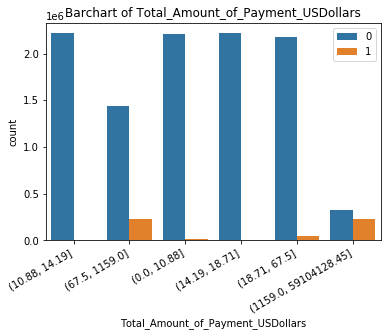

In [44]:
# bar chart of Total_Amount_of_Payment_USDollars
_ = sns.countplot(df["Total_Amount_of_Payment_USDollars"],hue=df['Target'])
_ = plt.legend(loc='upper right')
plt.xticks(rotation=30,ha="right")
plt.ticklabel_format(axis='y', style='sci',scilimits=(-2,2))
_ = plt.title("Barchart of Total_Amount_of_Payment_USDollars")

As the bar chart shown above, **Binning** is used for transforming continuous numeric feature into discrete one (categories). These discrete values or numbers can be thought of as categories or bins into which the raw. The feature "Total_Amount_of_Payment_USDollars" is convert to be a categorical feature with 6 bins, and the "Research" data is more likely to have a higher payemnt.

### 3.2   Methods convert categorical variables into numeric - OneHotEncode and TargetEncode

First, check the cardinality of each categorical features:

In [45]:
# check the number of unique values for each feature
df_cardinality = pd.DataFrame(df[df.columns[df.dtypes==np.object]].nunique(),columns=["Unique Number"])

In [46]:
df_cardinality

,Unique Number
Change_Type,3
Covered_Recipient_Type,4
Recipient_State,62
Recipient_Country,26
Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,1229
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,1314
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,1347
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,48
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,1
Total_Amount_of_Payment_USDollars,6


It's observed that some categorical features has few unique labels, such as **"Change_type"** with **3** labels; while some has high-cardinality, such as **"Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name"** with **1229** labels. The feature "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country" only has a single value, thus this feature will be dropped.

In [47]:
# split categorical features into two groups
ohe_columns = df_cardinality[df_cardinality["Unique Number"]<50].index.tolist()
tbe_columns = df_cardinality[df_cardinality["Unique Number"]>=50].index.tolist()

In [48]:
# output groups
print("Categorical features apply OneHotEncoding: ", ohe_columns)
print(" ")
print("Categorical features apply TargetBasedEncoding: ", tbe_columns)

Categorical features apply OneHotEncoding:  ['Change_Type', 'Covered_Recipient_Type', 'Recipient_Country', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country', 'Total_Amount_of_Payment_USDollars', 'Form_of_Payment_or_Transfer_of_Value', 'Dispute_Status_for_Publication', 'Related_Product_Indicator', 'Covered_or_Noncovered_Indicator_1', 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1']
 
Categorical features apply TargetBasedEncoding:  ['Recipient_State', 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name', 'Date_of_Payment', 'Product_Category_or_Therapeutic_Area_1', 'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1', 'Associated_Drug_or_Biological_NDC_1']


Split categorical features into two groups using **50** as the criteria:   
1) ***low-cardinality group***: the features has less than 50 unique categories, apply **OneHotEncoding** in the modeling preocess;  
2) ***high-cardinality group***: the features has more than 50 unique categories, apply **TargetEncoding** in the modeling preocess; 

The features in each group are shown in the output above.

### 3.3 Features Recheck

Then, we want to check the distribution of these features to see if there is still any that leaking the traget information:

In [49]:
#random sample 10% as the sample dataset
df_sample = df.sample(frac=0.1, replace=False, random_state=1)

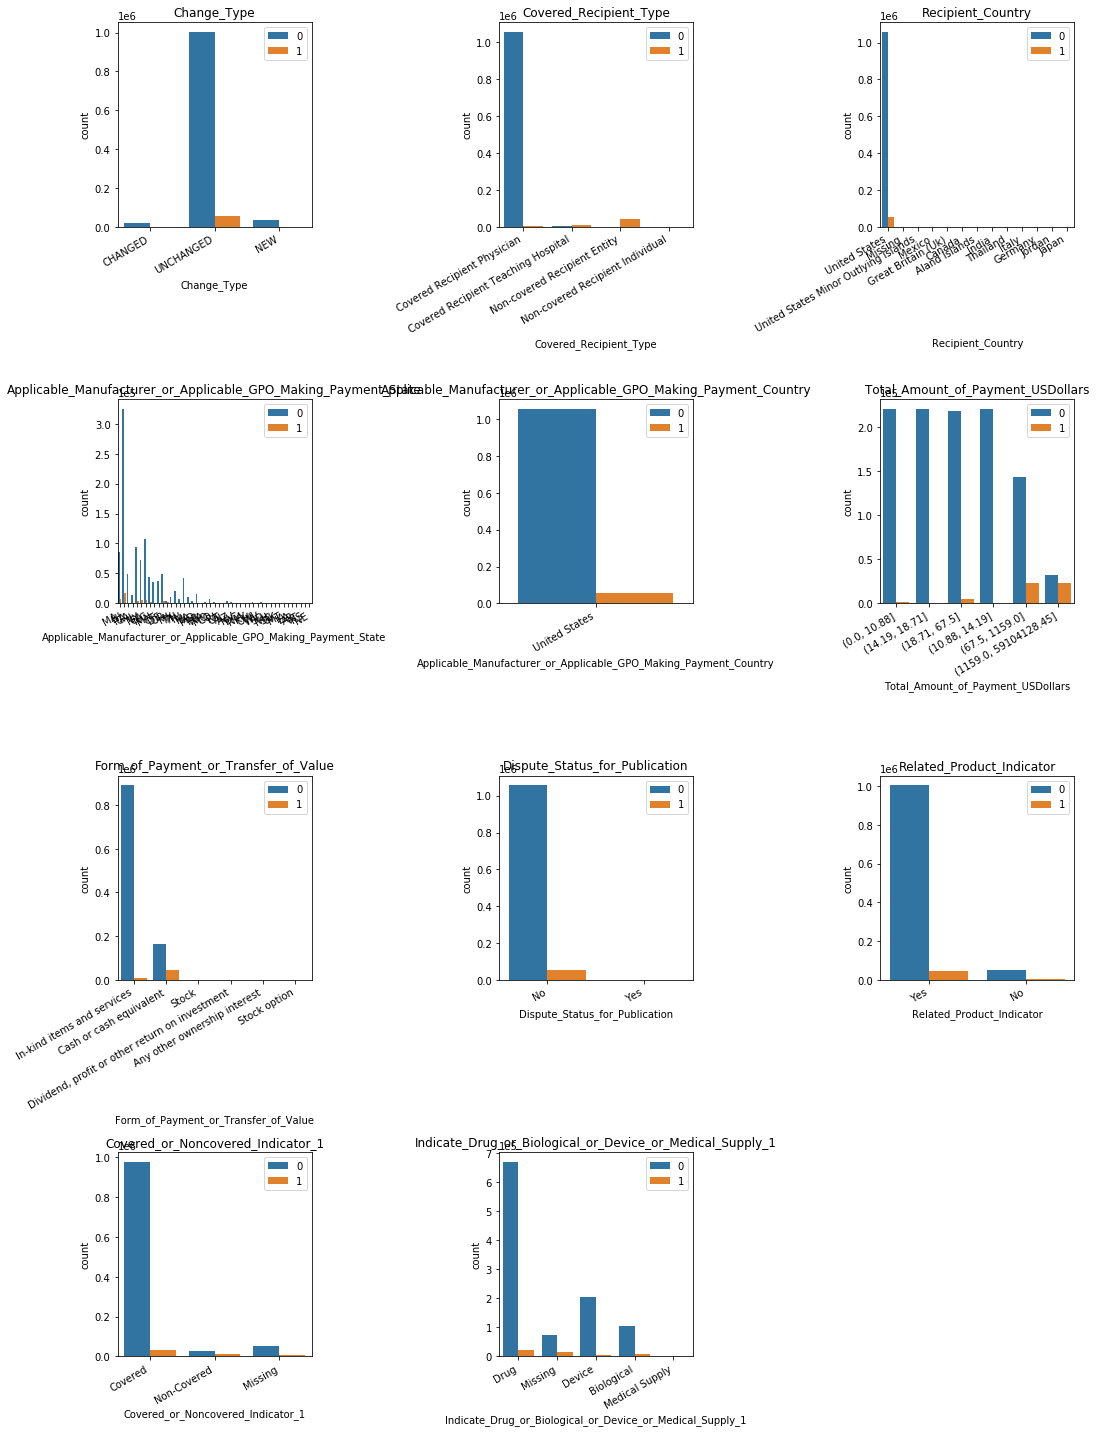

In [50]:
#Histogram for all low-cardinality features
fig = plt.figure(figsize=(15,20))
cols = 3
rows = 4
for i, column in enumerate(ohe_columns):
    
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)  
    sns.countplot(df_sample[column],hue=df_sample['Target'],axes=ax)
    plt.legend(loc='upper right')
    plt.xticks(rotation=30,ha="right")
    ax.ticklabel_format(axis='y', style='sci',scilimits=(-2,2))
        
plt.tight_layout()
plt.show()

From the bar chart above, it is observed that all features are both associated with two target classed, hence there is no feature leaking the target information here. Moreover, as the feature "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country" only has one value here, we drop it from the dataset.

In [51]:
df = df.drop(axis=1,columns=["Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country"])
# output shape of updated datasets
print("The shape of updated dataset is: ", df.shape)

The shape of updated dataset is:  (11106468, 19)


The updated dataset has **11106468** records and **19** features.

### 3.4 Imbalanced data

The distribution of "Target" is shown as the bar plot below:

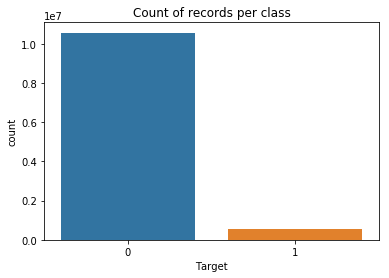

In [52]:
# barplot of Target variable
_ = sns.countplot(df["Target"])
_ = plt.title("Count of records per class")
plt.ticklabel_format(axis='y', style='sci',scilimits=(-2,2))

The above plot shows that the number of "General" class is nearly **18 times** as the number of "Research" class. As the "Target" class is not equally distributed, the dataset is imbalanced with a large amount of records for "General" class, and much fewer records for "Research" class.

The imbalanced dataset may cause poor classification of the minority classe, as classifiers may even predict all the test data as majority classes. Thus, we want to sampling from the dataset by making the "Target" classes equally distributed. 

The sampling mathod performed here is **"Undersampling"** in which we randomly select the samples from the majority class and discard the remaining.

In [53]:
#random sample 10% as the sample dataset
df_sample = df.sample(frac=0.1, replace=False, random_state=1)

In [54]:
from imblearn.under_sampling import RandomUnderSampler
# Resample the undated dataset with "Undersampling" method
rus = RandomUnderSampler(replacement=False)
X, y = rus.fit_sample(df_sample.iloc[:,:-1], df_sample["Target"])

The shape of resampled dataset is:  (108130, 18)


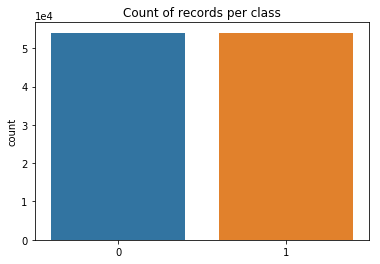

In [55]:
print("The shape of resampled dataset is: ", X.shape)
# barplot of Target variable
_ = sns.countplot(y)
_ = plt.title("Count of records per class")
plt.ticklabel_format(axis='y', style='sci',scilimits=(-2,2))

According to the output above, there are **108130** records and **18** features in the X of resampled dataset. The resampled dataset is balanced now, with half in "General" class, and other half in "Research" class.

### 3.5 Retry the baseline model

After the more in-depth preprocessing and data-cleaning, we will retry the baseline model on the updated dataset to evaluate the performance of the "Feature Engineering" process. 

In [56]:
# get the DataFrame format of X,y
df_X = pd.DataFrame(X, columns = df.columns[:-1])
df_y = pd.DataFrame(y, columns = [df.columns[-1]])

In [57]:
#split data in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [58]:
cat_ohe = [ele in ohe_columns for ele in df_X.columns]
cat_tbe = [ele in tbe_columns for ele in df_X.columns]

from dirty_cat import TargetEncoder

# scale the continuous features and OneHotEncoded categorical features
rebase_preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"),cat_ohe),
    (TargetEncoder(handle_unknown="ignore"),cat_tbe)
    )
#build pipeline with preprocessing and RidageClassifier
rebase_pipeline=make_pipeline(rebase_preprocess,RidgeClassifier())

In [59]:
# 5-fold cross-validation scores
rebase_cv = cross_val_score(rebase_pipeline, X_train, y_train, cv = 5)
rebase_cv = np.mean(rebase_cv)
print("The cross-validation score of baseline model: ", round(rebase_cv,4))

The cross-validation score of baseline model:  0.9763


The balanced accuracy score is 0.974659
Average precision score is 0.972473
The F-measure score is 0.974078


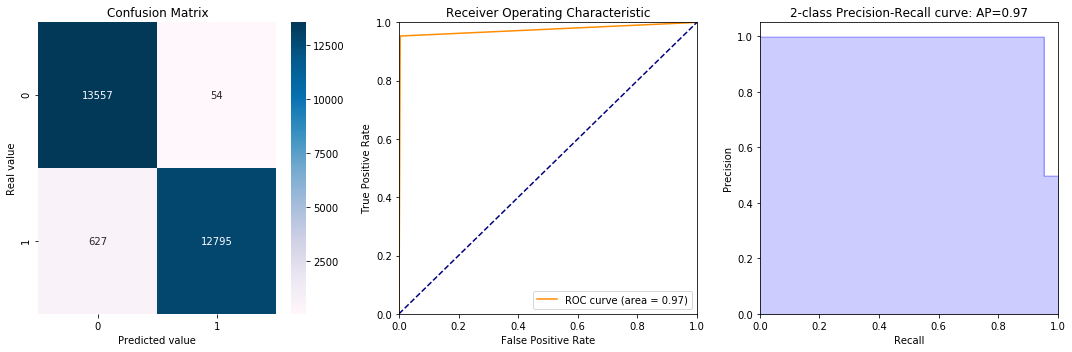

In [60]:
# fit the pipeline and predict
_ = rebase_pipeline.fit(X_train, y_train)
rebase_pred = rebase_pipeline.predict(X_test)

# use the plot_measurement function to get confusion matrix, roc, precision-recall curve
rebase_accuracy, rebase_precision, rebase_f1 = plot_measurement(y_test, rebase_pred)

In [61]:
# summarize the performance scores in a dataframe
d = {'CV_accuracy': [rebase_cv], 'Test_accuracy':[rebase_accuracy], 'Precision':[rebase_precision], 'f_score':[rebase_f1]}
df_rebase = pd.DataFrame(data=d, index=["Baseline after Feature Engineering"])
df_summary.append(df_rebase)


,CV_accuracy,Test_accuracy,Precision,f_score
Baseline,0.994131,0.975828,0.886386,0.940219
Baseline after Feature Engineering,0.976251,0.974659,0.972473,0.974078


According to the output and charts above, for the test dataset:  

the **cross-validation** score is **0.97**, **accuracy** on the test set is **0.97**, is still pretty high, but the average **precision** score is improved a lot from **0.88** to **0.97**. This is probably as a result of handling the **"Imbalanced"** dataset.

Compared with the performance of baseline model in **Section 2.5**, the dataset after more in-depth feature engineering process ***still keep a high accuacy, at the mean time, makes a great improvement on the precision.*** Considering the train accuracy and the test accuracy, the **"Overfitting" problem also get mitigated** here. 

## Task 4 Modeling

In this section, three classfication models are discussed here to improve the results, including **DecisionTrees**, **SVM**, and **GradientBoosting**. 

Before the modeling, we should transform the dataset as numerical values, using the **OneHotEncoded** and **TargetEncoded** methods discussed above. The trasnformation is processed on both training set and test set.

In [62]:
# OneHotEncoded the low-cardinality categorical features and 
#TargetEncoded the high-cardinality categorical features
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"),cat_ohe),
    (TargetEncoder(handle_unknown="ignore"),cat_tbe)
    )
# fit 
_ = preprocess.fit(X_train,y_train)
# transform
X_train_encoded = preprocess.transform(X_train)
X_test_encoded = preprocess.transform(X_test)

In [63]:
print("The shape of the transformed dataset is :", X_train_encoded.shape)

The shape of the transformed dataset is : (81097, 84)


The transformed dataset has **81097** records and **84** features. Then, we want to get the feature names after the transformation. As some features been OneHotEncoded, the new features are shown as the format of **"feature_label"**.

In [64]:
# get the feature names for the trasnformed dataset (X_train and X_test)
preprocess_name = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"),cat_ohe)
    )
# get feature names for onehotencoded
feature_names = preprocess_name.fit(X_train,y_train).get_feature_names()
# change to dataframe format
feature_names = pd.DataFrame(feature_names)
#remove the prefix "onehot_"
feature_names = feature_names.applymap(lambda x: str(x).lstrip("onehotencoder_"))
#replace prefix "x0,x1,x2..." as original column names
for (i,name) in enumerate(ohe_columns):
    feature_names = feature_names.applymap(lambda x: str(x).replace("x"+str(i),name))
# combine the onehotencoded feature names with targetencoded ones
ohe_transformed_names = feature_names.iloc[:,0].tolist()
feature_names = ohe_transformed_names + tbe_columns

In [65]:
print ("The numder of one-hot encoded features:", len(feature_names)-len(tbe_columns))
print ("The number of target encoded features:", len(tbe_columns))

The numder of one-hot encoded features: 76
The number of target encoded features: 8


Among **84** features of the transformed dataset, there are **76** One-hot encoded features, and **8** Target encoded features.

### 4.1 Decision Trees

In decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making. As DecisionTree is easy to understand and interprete, we explore the DecisionTree model first.

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

We will use **AUC** (Area Under Curve) as the evaluation metric to tune the parameter. Our target value is binary so it’s a binary classification problem. AUC is a good way for evaluation for this type of problems.

The parameter to tune is **max_depth**. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 20 and plot the training and test auc scores.

In [84]:
max_depths = list(range(2,22,2))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train_encoded, y_train)
    train_pred = dt.predict(X_train_encoded)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test_encoded)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)


Use the **"AUC score"** as y-axis, and **"Tree depth"** as x-axis, then plot the curve demonstrating the relationship between **"Train AUC"** and **"Test AUC"** with **"Tree depth"**:

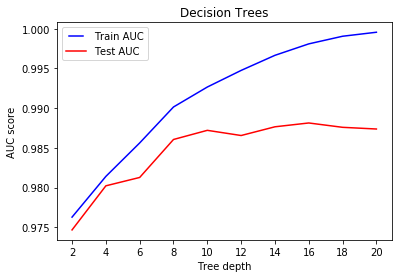

In [85]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.xticks(max_depths)
plt.title("Decision Trees")
plt.show()

From the plot above, the model achives the maximum Test score at **"Tree depth = 16"**. After that, although the training score is still increasing, the test score begins decrease, as a result of "Overfitting". Hence we will choose **"Tree depth = 16"** as the best parameter setting.

In [86]:
# 5-fold cross-validation scores
tree_cv = cross_val_score(DecisionTreeClassifier(max_depth=16), X_train_encoded, y_train, cv = 5)
tree_cv = np.mean(tree_cv)
print("The cross-validation score of DecisionTree: ", round(tree_cv,4))

The cross-validation score of DecisionTree:  0.99


The balanced accuracy score is 0.988067
Average precision score is 0.980950
The F-measure score is 0.987996


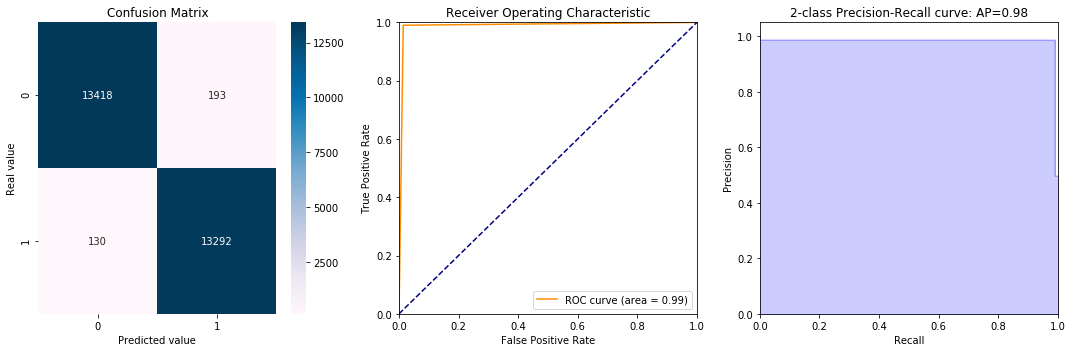

In [87]:
# fit and predict
tree = DecisionTreeClassifier(max_depth=15).fit(X_train_encoded, y_train)
tree_pred = tree.predict(X_test_encoded)

# use the plot_measurement function to get confusion matrix, roc, precision-recall curve
tree_accuracy, tree_precision, tree_f1 = plot_measurement(y_test, tree_pred)

In [88]:
# summarize the performance scores in a dataframe
d = {'CV_accuracy': [tree_cv], 'Test_accuracy':[tree_accuracy], 'Precision':[tree_precision], 'f_score':[tree_f1]}
df_tree = pd.DataFrame(data=d, index=["Decision Tree"])
df_summary.append([df_rebase,df_tree])

,CV_accuracy,Test_accuracy,Precision,f_score
Baseline,0.994131,0.975828,0.886386,0.940219
Baseline after Feature Engineering,0.976251,0.974659,0.972473,0.974078
Decision Tree,0.990000,0.988067,0.980950,0.987996


According to the output and charts above:  

the **cross-validation** score is **0.99**, **accuracy** on the test set is **0.98**, is higher than the baseline model; the average **precision** score is improved a lot to **0.98**, and the **F1 score** improved to **0.98**. The **ROC** and **Precision-recall curve** are also closer to the perfect result. 

In conclusion, the **Decision Tree** model achieves a better performance compared to Baseline model. Considering the train accuracy and the test accuracy, the **"Overfitting" problem also get mitigated** here. 

### 4.2 Support Vector Machine (SVM)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. 

The implementation of **SVC** is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples. What's more, as the **Baseline linear model** - RidgeClassifier - shows a good performance in ***Section 3.5***, we want to try another Linear Support Vector Classification - **LinearSVM** instead of **SVC** here.

In [72]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

We will use the cross-validation score from **GridSearchCV** as the evaluation metric. GridSearchCV exhaustively considers all parameter combinations over specified hyper-parameter space for the best cross validation score.

The parameters to tune is **C**, which is the penalty parameter of the error term. The GridSearch values for C is *np.logsapce(-2,2,10)*.


In [73]:
# Create param grid.
param_grid = [{'C' : np.logspace(-2, 2, 10)}]
# Create grid search object
svm_gs = GridSearchCV(LinearSVC(), param_grid = param_grid, cv = 5)
# Fit on data
best_svm = svm_gs.fit(X_train_encoded, y_train)
# View best hyperparameters
#print('Best Penalty:', best_svm.best_estimator_.get_params()['penalty'])
print('Best C:', best_svm.best_estimator_.get_params()['C'])

Best C: 4.6415888336127775


The best hyperparameter combination is **C=4.64**.

In [74]:
# 5-fold cross-validation scores for the best hyperparameters
svm_cv = best_svm.best_score_
print("The cross-validation score of LinearSVM: ", round(svm_cv,4))

The cross-validation score of LinearSVM:  0.9856


The balanced accuracy score is 0.984125
Average precision score is 0.979124
The F-measure score is 0.983959


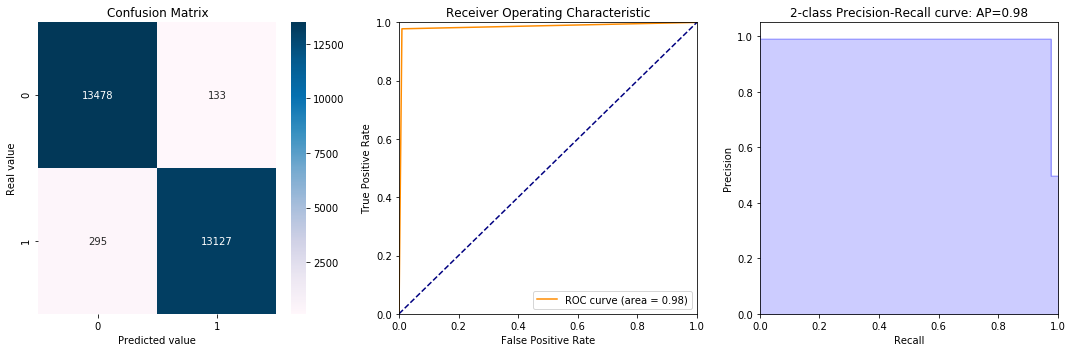

In [89]:
# predict with the best logistic regression model
svm_pred = best_svm.predict(X_test_encoded)

# use the plot_measurement function to get confusion matrix, roc, precision-recall curve
svm_accuracy, svm_precision, svm_f1 = plot_measurement(y_test, svm_pred)

In [90]:
# summarize the performance scores in a dataframe
d = {'CV_accuracy': [svm_cv], 'Test_accuracy':[svm_accuracy], 'Precision':[svm_precision], 'f_score':[svm_f1]}
df_svm = pd.DataFrame(data=d, index=["Support Vector Machine"])
df_summary.append([df_rebase,df_tree,df_svm])

,CV_accuracy,Test_accuracy,Precision,f_score
Baseline,0.994131,0.975828,0.886386,0.940219
Baseline after Feature Engineering,0.976251,0.974659,0.972473,0.974078
Decision Tree,0.990000,0.988067,0.980950,0.987996
Support Vector Machine,0.985610,0.984125,0.979124,0.983959


According to the output and charts above:  

the **cross-validation** score is **0.98**, **accuracy** on the test set is **0.98**, is higher than the baseline model, but lower than the **DecisionTree**; the average **precision** score is **0.97**, and the **F1 score** improved to **0.98**, which is better than the baseline model, but weaker than **DecisionTree**, nearly same as **LogisticRegression**. The **ROC** and **Precision-recall curve** are also closer to the perfect result. 

In conclusion, although the **SVM** model is also a linear model, it achieves a better performance compared to Baseline model. Considering the train accuracy and the test accuracy, the **"Overfitting" problem also get mitigated** here. 

### 4.3 Gradient Boosting

Boosting is a sequential technique which works on the principle of ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher.

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

Though, GBM is robust enough to not overfit with increasing trees, but a high number for a particular learning rate can lead to overfitting. But as we reduce the learning rate and increase trees, the computation becomes expensive and would take a long time to run on standard personal computers. 

Hence, the parameters to tune is **learning_rate** and **n_estimators**. **learning_rate** is used to shrink the contribution of each tree. **n_estimators** is the number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. The GridSearch values for learning_rate is *[0.5,0.25,0.1,0.05,0.1]*, for n_estimators is *[16,32,64]*.

In [92]:
# Create param grid.
param_grid = {'learning_rate':[0.5,0.25,0.1,0.05,0.01],'n_estimators':[16,32,64]}
# Create grid search object
gb_gs = GridSearchCV(GradientBoostingClassifier(), param_grid = param_grid, cv = 5)
# Fit on data
best_gb = gb_gs.fit(X_train_encoded, y_train)
# View best hyperparameters
print('Best learning rate:', best_gb.best_estimator_.get_params()['learning_rate'])
print('Best number of boosting estimators:',best_gb.best_estimator_.get_params()['n_estimators'])

Best learning rate: 0.5
Best number of boosting estimators: 64


The best hyperparameter combination is **learning_rate=0.5**, and **n_estimators = 64**.

In [93]:
# 5-fold cross-validation scores for the best hyperparameters
gb_cv = best_gb.best_score_
print("The cross-validation score of GradientBoosting: ", round(gb_cv,4))

The cross-validation score of GradientBoosting:  0.9911


The balanced accuracy score is 0.989151
Average precision score is 0.984401
The F-measure score is 0.989069


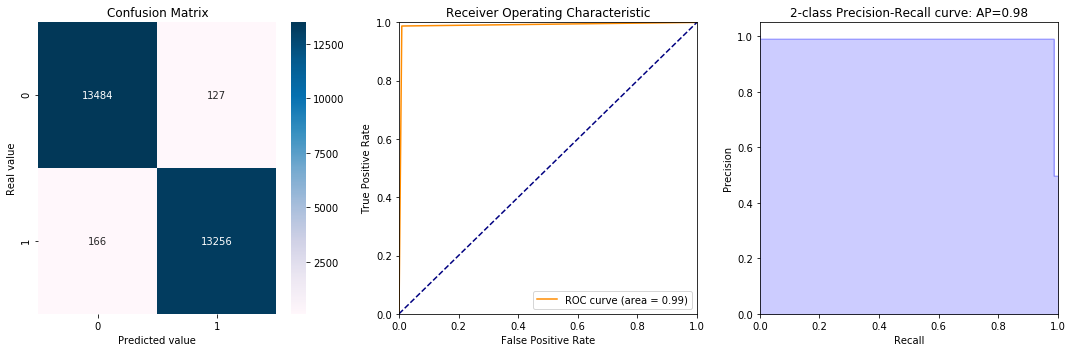

In [94]:
# predict with the best logistic regression model
gb_pred = best_gb.predict(X_test_encoded)
# use the plot_measurement function to get confusion matrix, roc, precision-recall curve
gb_accuracy, gb_precision, gb_f1 = plot_measurement(y_test, gb_pred)

In [95]:
# summarize the performance scores in a dataframe
d = {'CV_accuracy': [gb_cv], 'Test_accuracy':[gb_accuracy], 'Precision':[gb_precision], 'f_score':[gb_f1]}
df_gb = pd.DataFrame(data=d, index=["Gradient Boosting"])
df_summary.append([df_rebase,df_tree,df_svm,df_gb])

,CV_accuracy,Test_accuracy,Precision,f_score
Baseline,0.994131,0.975828,0.886386,0.940219
Baseline after Feature Engineering,0.976251,0.974659,0.972473,0.974078
Decision Tree,0.990000,0.988067,0.980950,0.987996
Support Vector Machine,0.985610,0.984125,0.979124,0.983959
Gradient Boosting,0.991097,0.989151,0.984401,0.989069


According to the output and charts above:  

the **cross-validation** score is **0.99**, **accuracy** on the test set is **0.98**, is higher than the baseline model, and other models; the average **precision** score is **0.98**, and the **F1 score** improved to **0.99**, which is better than the baseline model as well as all other models. The **ROC** and **Precision-recall curve** are very close to be perfect. 

In conclusion, **GradientBoosting** performs best among all the models. It not only achieves a very high accuracy, but also a high precision. Considering the train accuracy and the test accuracy, the **"Overfitting" problem also get mitigated** here. However, if considering the cost of all the classifiers as well as the performance, the baseline model using **RidgeClassifier** and **DecisionTree** are also good choices for model.

## Task 5 Feature Selections

According to the conclusion in ***Section 4***, the model performs best is ***GradientBoosting*** with **learning_rate=0.5**, and **n_estimators = 64**. We will call the **"feature_importances"** method to find the importance of each feature. The returned values is a positive number, and the higher the number, the more important the corresponding feature.

In [96]:
# model with best performance - gradient boosting 
best_model = GradientBoostingClassifier(learning_rate=0.5, n_estimators=64)
_ = best_model.fit(X_train_encoded,y_train)

In [97]:
# get importance of each feature
feature_importance = best_model.feature_importances_.tolist()
# sort
df_imp = pd.DataFrame({'Feature':feature_names,'Importance':feature_importance})
df_imp = df_imp.sort_values('Importance')

In [98]:
# features that not influential to the model
df_zero_imp = df_imp[df_imp['Importance']==0]
df_nonzero_imp = df_imp[df_imp['Importance']>0]
print ("Number of features that not influential to the model: ", df_zero_imp.shape[0])
print ("Number of features that are influential to the model: ", df_nonzero_imp.shape[0])

Number of features that not influential to the model:  33
Number of features that are influential to the model:  51


### 5.1 Transformed feature importance 

After the OneHotEncoded and TargetEncoded process, we have 84 features in the transformed dataset. Among these features, there are **51** features that are influential to the model(importance greater than 0), and **31** features that are not(importance equals 0).

The importance all **84** features that are influential to the model is shown in the scatter plot below:


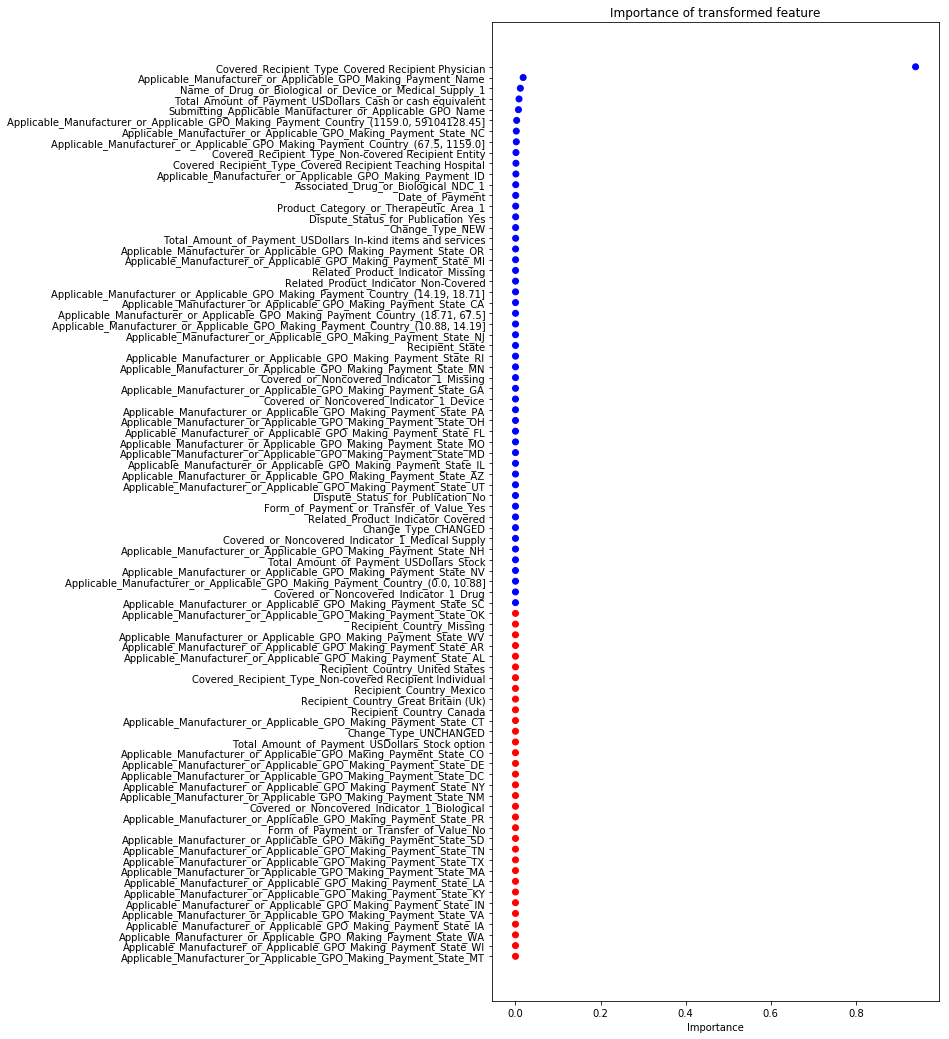

In [99]:
# show the importance of features in bar chart
fig = plt.figure(figsize=(8,18))
_ = plt.scatter(df_imp['Importance'],df_imp['Feature'],c=np.sign(df_imp['Importance']), cmap="bwr_r")
_ = plt.title("Importance of transformed feature")
_ = plt.xlabel("Importance")

On the scatter plot above, the y-axis is the feature name, x-axis is the corresponding importance value. The **"Blue" point** has the importance greater than 0, while the **"Red" point** has the importance equals 0.

It's observed that  
1) only few influential features has a significant importance value, for instance, feature "Covered_Recipient_Type_Covered Recipient Physician";  
2) among **84** features, there are **76** One-hot encoded features, and **8** Target encoded features, these one-hot encoded features are shown with seperate importance for each label. 


### 5.2 Grouped feature importance


Next, we want to combine the one-hot encoded features as the original one and resummarize their importance values.

In [100]:
df_original_imp = df_imp.copy()

In [101]:
import re
# remove the suffix added to the ohe-hot encoded features
original_feature_name = []
for feature in df_original_imp['Feature']:
    if feature in ohe_transformed_names:
        original_feature_name.append(re.sub(r"_[a-zA-Z\s\-\,()0-9\].]+$","",feature))
    else:
        original_feature_name.append(feature)  

# add a new column with feature names asoriginal one before one-hot encoding     
df_original_imp['Original feature'] = original_feature_name
# group by original names and sum the importance values
df_grouped_imp = df_original_imp.groupby('Original feature')['Importance'].sum()
# dataframe format
df_grouped_imp = df_grouped_imp.reset_index().sort_values('Importance')

Grouped the features back as the original onesbefore One-hot Encoding, and sum the importance of each group, the grouped imporatnce are shown in the scatter plot below:

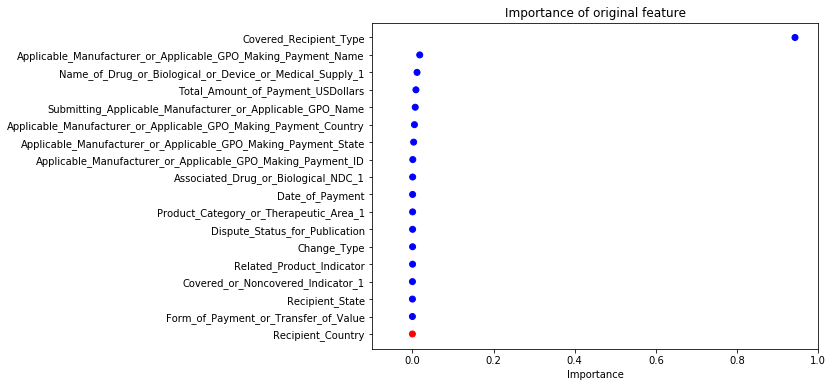

In [102]:
# show the importance of features in bar chart
fig = plt.figure(figsize=(8,6))
_ = plt.scatter(df_grouped_imp['Importance'],df_grouped_imp['Original feature'],
                c=np.sign(df_grouped_imp['Importance']), cmap="bwr_r")
_ = plt.title("Importance of original feature")
_ = plt.xlabel("Importance")
_ = plt.xlim(-0.1,1)

On the scatter plot above, the y-axis is the grouped feature name, x-axis is the corresponding aggregated importance value. The **"Blue" point** has the importance greater than 0, while the **"Red" point** has the importance equals 0.

It's observed that:  
1) the feature "Covered_Recipient_Type" takes the most importance of the GradientBoosting model. It's importance is 94%, which is far more than any other feature;  
2) the top three features are "Covered_Recipient_Type"(94.3%), "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name"(1.8%), and "Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1"(1.1%).

### 5.3 Make feature selections

As indicated above, the top three features are **"Covered_Recipient_Type"** (94.3%), **"Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name"** (1.8%) and **"Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1"** (1.1%). Only keep these three features and rebuilt the GradientBoosting model.

In [109]:
most_signi_feature = ["Covered_Recipient_Type", 
                      "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name", 
                      "Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1"]
#get the column index of most significant features
most_signi_colindex = [df_sample.columns.get_loc(c) for c in most_signi_feature]
# get the train and test data for most significant features
X_train_most_signi = X_train[:,most_signi_colindex]
X_test_most_signi = X_test[:,most_signi_colindex]

In [110]:
cat_ohe_most_signi = [cat_ohe[i] for i in most_signi_colindex]
cat_tbe_most_signi = [cat_tbe[i] for i in most_signi_colindex]
# OneHotEncoded the low-cardinality categorical features and 
#TargetEncoded the high-cardinality categorical features
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"),cat_ohe_most_signi),
    (TargetEncoder(handle_unknown="ignore"),cat_tbe_most_signi)
    )
# preprocess the data
_ = preprocess.fit(X_train_most_signi,y_train)
# transform
X_train_most_signi_encoded = preprocess.transform(X_train_most_signi)
X_test_most_signi_encoded = preprocess.transform(X_test_most_signi)

In [111]:
# 5-fold cross-validation scores
most_signi_cv = cross_val_score(best_model, X_train_most_signi_encoded, y_train, cv = 5)
most_signi_cv = np.mean(most_signi_cv)
print("The cross-validation score of the reduced GradientBoosting model: ", round(most_signi_cv,4))

The cross-validation score of the reduced GradientBoosting model:  0.9851


The balanced accuracy score is 0.982498
Average precision score is 0.976625
The F-measure score is 0.982313


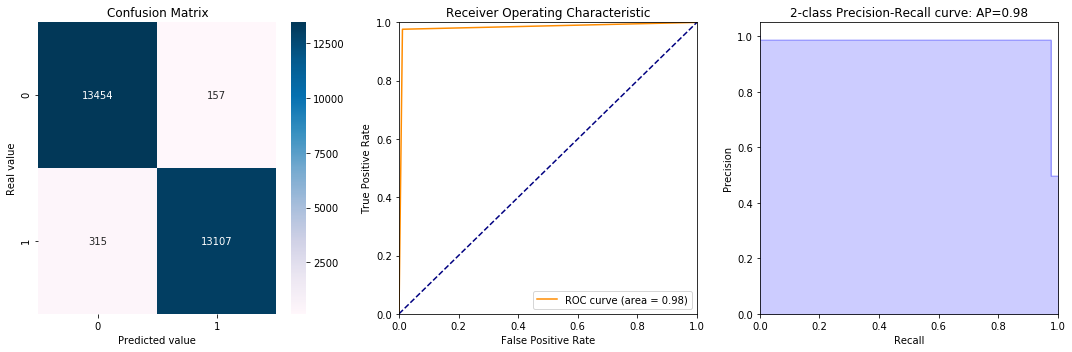

In [112]:
# predict with the best logistic regression model
_ = best_model.fit(X_train_most_signi_encoded, y_train)
most_signi_pred = best_model.predict(X_test_most_signi_encoded)

# use the plot_measurement function to get confusion matrix, roc, precision-recall curve
most_signi_accuracy, most_signi_precision, most_signi_f1 = plot_measurement(y_test, most_signi_pred)

In [113]:
# summarize the performance scores in a dataframe
d = {'CV_accuracy': [most_signi_cv], 'Test_accuracy':[most_signi_accuracy], 'Precision':[most_signi_precision], 'f_score':[most_signi_f1]}
df_rgb = pd.DataFrame(data=d, index=["GradientBoosting after feature selection"])
df_summary.append([df_rebase,df_tree,df_svm,df_gb,df_rgb])

,CV_accuracy,Test_accuracy,Precision,f_score
Baseline,0.994131,0.975828,0.886386,0.940219
Baseline after Feature Engineering,0.976251,0.974659,0.972473,0.974078
Decision Tree,0.990000,0.988067,0.980950,0.987996
Support Vector Machine,0.985610,0.984125,0.979124,0.983959
Gradient Boosting,0.991097,0.989151,0.984401,0.989069
GradientBoosting after feature selection,0.985104,0.982498,0.976625,0.982313


According to the output and charts above:  

the **cross-validation** score is **0.98**, **accuracy** on the test set is **0.98**, the average **precision** score is **0.97**, and the **F1 score** improved to **0.98**. Although the **reduced GradientBoosting model** after feature selection performs not as good as the best one, it's better than the **baseline** model, and similar to the **SVM** model.

In conclusion, the best model **Gradient Boosting** still has a good performance by only keeping top three important features "Covered_Recipient_Type", "Form_of_Payment_or_Transfer_of_Value"and "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name", as well as remove all other features. Although it does not make the model better, the feature reduction has very little influence on the performance of the model.


## Task 6 An Explainable Model - Logistic Regression

In this section, we will create an "explainable" model that is nearly as good as the best model. This explainable model should be small enough to be easily inspected. Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. It is a special case of linear regression where the target variable is categorical in nature. 

As the **Baseline linear model** - RidgeClassifier - shows a good performance in ***Section 3.5***, we want to try another linear model - **Logistic Regression** here. Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification

Hence, we will implement a **LogisticRegression** model, which is linear. We will use the "l1" penalty for the LogisticRegression model, so that only significant features will be modeled. 

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2

In [115]:
# Select features according to the logistic regression model
skb = SelectKBest(chi2, k=15).fit(X_train_encoded, y_train)

In [116]:
# select the features according to the SelectKBest result
X_train_selected = skb.transform(X_train_encoded)
X_test_selected = skb.transform(X_test_encoded)
# get the index of selected 15 best features
selcted_feature_index = skb.get_support(indices=True)
# get the names of selected 15 best features
selected_feature_names = [feature_names[i] for i in selcted_feature_index]

We will use the cross-validation score from **GridSearchCV** as the evaluation metric. GridSearchCV exhaustively considers all parameter combinations over specified hyper-parameter space for the best cross validation score.

The parameters to tune is **C**, which is a positive float, representing the inverse of regularization strength. Like in support vector machines, smaller values specify stronger regularization. The GridSearch values for C is *np.logsapce(-2,2,10)*.


In [117]:
# Create param grid.
param_grid = [{'C' : np.logspace(-2, 2, 10)}]
# Create grid search object
lr_gs = GridSearchCV(LogisticRegression(penalty='l1'), param_grid = param_grid, cv = 5, n_jobs=-1)
# Fit on data
best_lr = lr_gs.fit(X_train_selected, y_train)
# View best hyperparameters
print('Best C:', best_lr.best_estimator_.get_params()['C'])

Best C: 12.915496650148826


The best hyperparameter combination is **C=35.94**.

In [118]:
# 5-fold cross-validation scores for the best hyperparameters
lr_cv = best_lr.best_score_
print("The cross-validation score of GradientBoosting: ", round(lr_cv,4))

The cross-validation score of GradientBoosting:  0.9815


The balanced accuracy score is 0.980665
Average precision score is 0.975352
The F-measure score is 0.980417


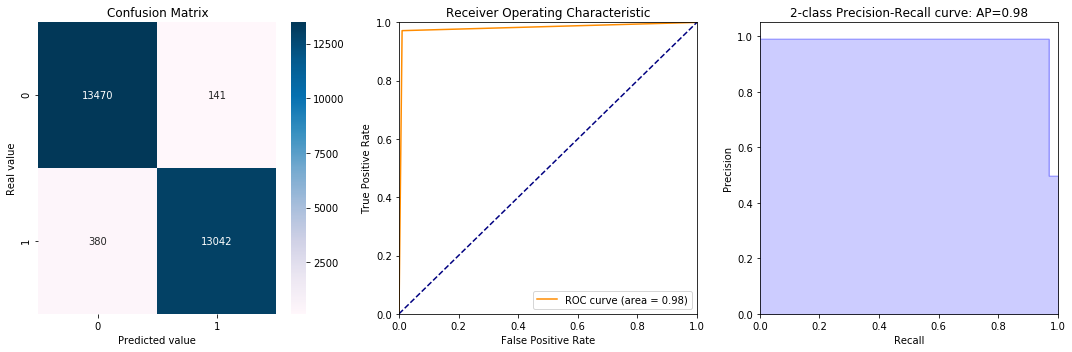

In [119]:
# predict with the best logistic regression model
lr_pred = best_lr.predict(X_test_selected)

# use the plot_measurement function to get confusion matrix, roc, precision-recall curve
lr_accuracy, lr_precision, lr_f1 = plot_measurement(y_test, lr_pred)

In [120]:
# summarize the performance scores in a dataframe
d = {'CV_accuracy': [lr_cv], 'Test_accuracy':[lr_accuracy], 'Precision':[lr_precision], 'f_score':[lr_f1]}
df_lr = pd.DataFrame(data=d, index=["Logistic Regression"])
df_summary.append([df_rebase,df_tree,df_svm,df_gb,df_rgb,df_lr])

,CV_accuracy,Test_accuracy,Precision,f_score
Baseline,0.994131,0.975828,0.886386,0.940219
Baseline after Feature Engineering,0.976251,0.974659,0.972473,0.974078
Decision Tree,0.990000,0.988067,0.980950,0.987996
Support Vector Machine,0.985610,0.984125,0.979124,0.983959
Gradient Boosting,0.991097,0.989151,0.984401,0.989069
GradientBoosting after feature selection,0.985104,0.982498,0.976625,0.982313
Logistic Regression,0.981454,0.980665,0.975352,0.980417


According to the output and charts above:  

the **cross-validation** score is **0.98**, **accuracy** on the test set is **0.98**, is lower than the **GradientBoosting** model, but better than the **Baseline** model; the average **precision** score is **0.97**, and the **F1 score** improved to **0.98**, which is is lower than the **GradientBoosting** model, but better than the **Baseline** model. The **ROC** and **Precision-recall curve** are also close to the perfect result. Considering the train accuracy and the test accuracy, the **"Overfitting" problem also get mitigated** here. 

In conclusion, although the **Logistic Regression** model is also a linear model and the coefficients has been reduced to 15, it still achieves a good performance with only a few enough coefficients. What's more, as a linear model, the Logistic Regression model, it has a better performance than the RidgeClassifier(Baseline); at the same tine, the coefficients of Logistic Regression model are easy to interprete and understand.

We can visualize the coefficients of Logistic Regression model below:

In [121]:
# get the coeficient of features
lr = LogisticRegression(C=best_lr.best_estimator_.get_params()['C']).fit(X_train_selected, y_train)
lr_coef = lr.coef_[0].tolist()

In [122]:
df_skb_lr = pd.DataFrame({'Feature':selected_feature_names,'Coefficient':lr_coef})
# sort based on coefficients
df_skb_lr = df_skb_lr.sort_values('Coefficient')

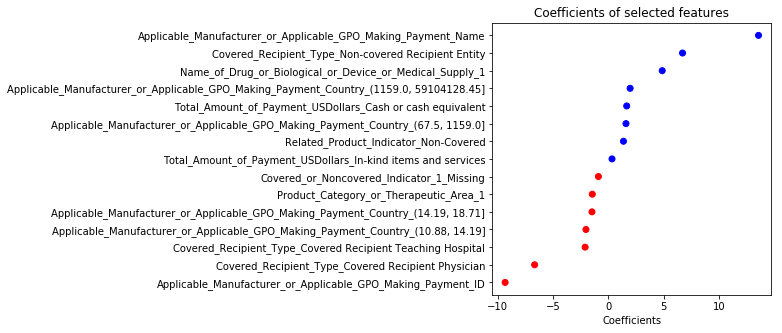

In [123]:
# show the importance of features in bar chart
fig = plt.figure(figsize=(5,5))
_ = plt.scatter(df_skb_lr['Coefficient'], df_skb_lr['Feature'],c=np.sign(df_skb_lr['Coefficient']), cmap="bwr_r")
_ = plt.title("Coefficients of selected features")
_ = plt.xlabel("Coefficients")


In the coefficient scatterplot above,  

1) the color denotes the **sign of the coefficients** - blue for positive, red for negative. A positive sign means that all else being equal, a payment by a company to a medical doctor or facility is more likely be a part of a research. On the opposite,  a negative sign means that all else being equal, a payment by a company to a medical doctor or facility is more likely be a part of a general payment;   
2) the **absolute magnitude of the coefficient** denote the **importance** of the corresponding feature. A large absolute magnitude of the coefficient means that all else being equal, the feature has more influence on the classification. On the opposite, a small absolute magnitude of the coefficient means that all else being equal, the feature has less influence on the classification. 

Hence, this logistic regression model can be interpreted according to the sign and magnitude of the coefficients. For instance, the feature **"Covered_Recipient_Type_Non-covered Recipient Entity"** has a positive high-magnitude coefficient, indicating the Covered_Recipient_Type as a "Non-covered Recipient Entity" seems very likely to get a ***"Research"**** payment. On the contrary, the feature **"Covered_Recipient_Type_Covered Recipient Teaching Hospital"** has a negative small-magnitude coefficient, indicating the Covered_Recipient_Type as a "Covered Recipient Teaching Hospital" seems has a little tendency to get a ***"General"*** payment.